importance analysis
%pip install pandas numpy scikit-learn seaborn matplotlib scipy

Note: you may need to restart the kernel to use updated packages.
=== ABS Recovery Performance Analysis ===

Correlations with Recovery Performance:
Recovery_Performance                                                      1.000000
Total_Recovery_Amount                                                     0.335400
Substandard_IRR                                                           0.319181
Substandard_Loan_Ratio                                                    0.279512
Borrower_Count                                                            0.252227
Total_Assets                                                              0.237052
Actual_NPL_Proportion                                                     0.148276
Principal_Interest_Balance                                                0.084051
Weighted_Average_Credit_Limit_Granted_to_Borrowers_(Ten_Thousand_Yuan)   -0.067437
Doubtful_Loan_Ratio                                                      -0.192031
Weighted_Average_Age_

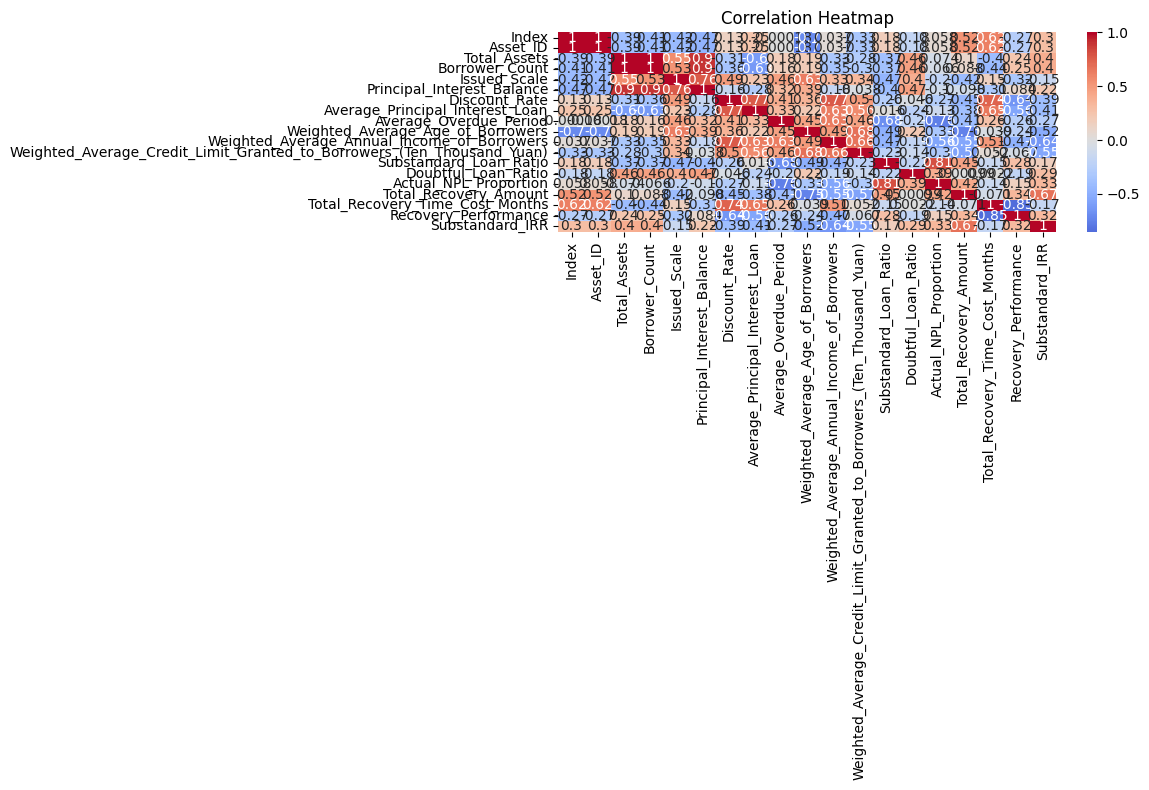


Feature Importance:
                                        Feature  Importance
12              Total_Recovery_Time_Cost_Months    0.746544
4                                 Discount_Rate    0.058088
10                          Doubtful_Loan_Ratio    0.028697
1                                Borrower_Count    0.023382
11                        Actual_NPL_Proportion    0.022898
5               Average_Principal_Interest_Loan    0.021511
3                    Principal_Interest_Balance    0.018752
7             Weighted_Average_Age_of_Borrowers    0.018304
8   Weighted_Average_Annual_Income_of_Borrowers    0.015609
9                        Substandard_Loan_Ratio    0.014081
2                                  Issued_Scale    0.012173
6                        Average_Overdue_Period    0.010879
0                                  Total_Assets    0.009083


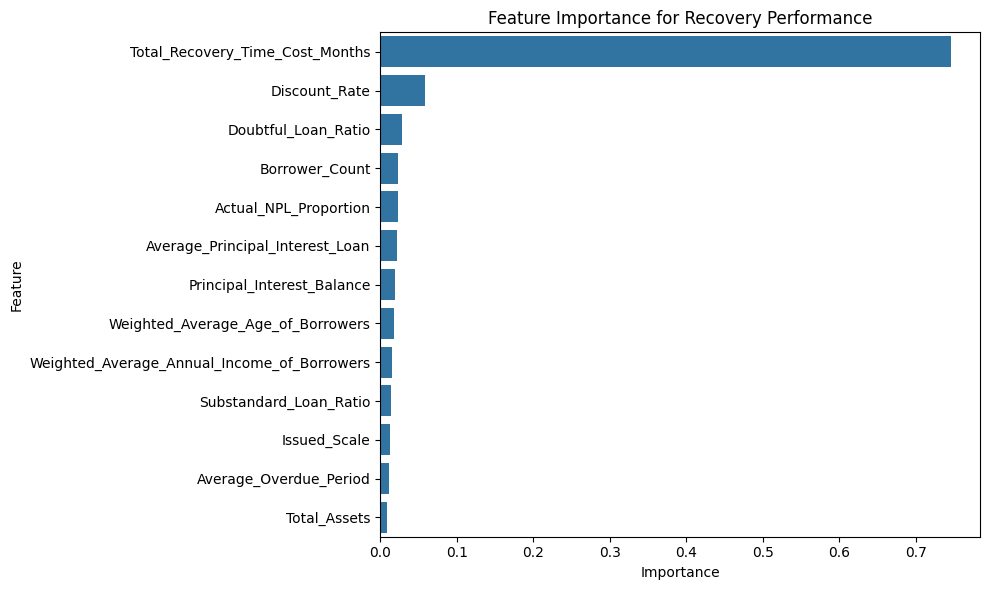


Statistical Analysis:

Summary Statistics for Recovery Performance:
count    22.000000
mean      1.788256
std       0.754969
min       0.456503
25%       1.399864
50%       1.842703
75%       2.193040
max       2.923565
Name: Recovery_Performance, dtype: float64

Normality test p-value for Recovery Performance: 0.553786340378426

Correlation between Recovery Time and Performance:
Correlation coefficient: -0.850
P-value: 0.000


In [2]:
%pip install pandas numpy scikit-learn seaborn matplotlib scipy

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def load_and_prepare_data(file_path):
    """
    Load and prepare the ABS data for analysis
    """
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Remove rows with missing Asset_ID
    df = df[df['Asset_ID'].notna()]

    # Convert date columns to datetime
    df['Initial_Start_Date'] = pd.to_datetime(df['Initial_Start_Date'])
    df['Actual_End_Date'] = pd.to_datetime(df['Actual_End_Date'])

    return df

def correlation_analysis(df):
    """
    Analyze correlations with Recovery_Performance
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Calculate correlations with Recovery_Performance
    correlations = df[numerical_cols].corr()['Recovery_Performance'].sort_values(ascending=False)

    print("\nCorrelations with Recovery Performance:")
    print(correlations)

    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

def feature_importance_analysis(df):
    """
    Analyze feature importance using Random Forest
    """
    # Select features for analysis
    feature_cols = [
        'Total_Assets', 'Borrower_Count', 'Issued_Scale',
        'Principal_Interest_Balance', 'Discount_Rate',
        'Average_Principal_Interest_Loan', 'Average_Overdue_Period',
        'Weighted_Average_Age_of_Borrowers', 'Weighted_Average_Annual_Income_of_Borrowers',
        'Substandard_Loan_Ratio', 'Doubtful_Loan_Ratio', 'Actual_NPL_Proportion',
        'Total_Recovery_Time_Cost_Months'
    ]

    X = df[feature_cols]
    y = df['Recovery_Performance']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_scaled, y)

    # Get feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance:")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance for Recovery Performance')
    plt.tight_layout()
    plt.show()

def statistical_analysis(df):
    """
    Perform statistical analysis of key relationships
    """
    print("\nStatistical Analysis:")

    # Key metrics summary
    print("\nSummary Statistics for Recovery Performance:")
    print(df['Recovery_Performance'].describe())

    # Test for normality
    _, p_value = stats.normaltest(df['Recovery_Performance'])
    print(f"\nNormality test p-value for Recovery Performance: {p_value}")

    # Analyze relationship with time cost
    correlation, p_value = stats.pearsonr(
        df['Total_Recovery_Time_Cost_Months'],
        df['Recovery_Performance']
    )
    print(f"\nCorrelation between Recovery Time and Performance:")
    print(f"Correlation coefficient: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")

def analyze_abs_data(file_path):
    """
    Main function to analyze ABS data
    """
    # Load and prepare data
    df = load_and_prepare_data(file_path)

    # Perform analyses
    print("=== ABS Recovery Performance Analysis ===")

    # Correlation analysis
    correlation_analysis(df)

    # Feature importance analysis
    feature_importance_analysis(df)

    # Statistical analysis
    statistical_analysis(df)

    return df

if __name__ == "__main__":
    # Replace with your file path
    file_path = "data/cleaned_sheet1_data.csv"
    df = analyze_abs_data(file_path)


Feature Importance:
                                        Feature  Importance
12              Total_Recovery_Time_Cost_Months    0.746544
4                                 Discount_Rate    0.058088
10                          Doubtful_Loan_Ratio    0.028697
1                                Borrower_Count    0.023382
11                        Actual_NPL_Proportion    0.022898
5               Average_Principal_Interest_Loan    0.021511
3                    Principal_Interest_Balance    0.018752
7             Weighted_Average_Age_of_Borrowers    0.018304
8   Weighted_Average_Annual_Income_of_Borrowers    0.015609
9                        Substandard_Loan_Ratio    0.014081
2                                  Issued_Scale    0.012173
6                        Average_Overdue_Period    0.010879
0                                  Total_Assets    0.009083


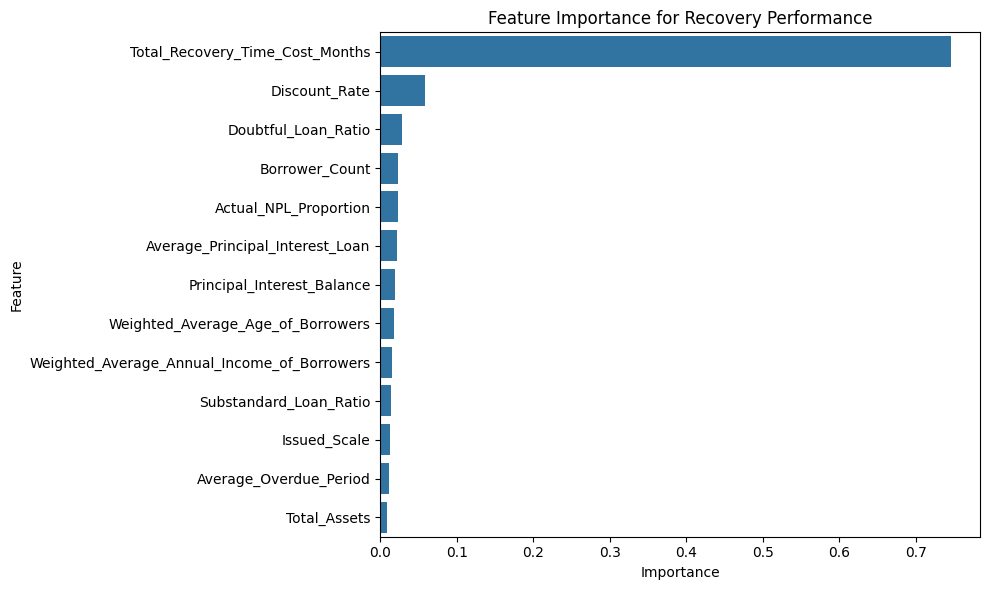

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    """
    Load and prepare the ABS data for analysis
    """
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Remove rows with missing Asset_ID
    df = df[df['Asset_ID'].notna()]

    # Convert date columns to datetime
    df['Initial_Start_Date'] = pd.to_datetime(df['Initial_Start_Date'])
    df['Actual_End_Date'] = pd.to_datetime(df['Actual_End_Date'])

    return df

def feature_importance_analysis(df):
    """
    Analyze feature importance using Random Forest
    """
    # Select features for analysis
    feature_cols = [
        'Total_Assets', 'Borrower_Count', 'Issued_Scale',
        'Principal_Interest_Balance', 'Discount_Rate',
        'Average_Principal_Interest_Loan', 'Average_Overdue_Period',
        'Weighted_Average_Age_of_Borrowers', 'Weighted_Average_Annual_Income_of_Borrowers',
        'Substandard_Loan_Ratio', 'Doubtful_Loan_Ratio', 'Actual_NPL_Proportion',
        'Total_Recovery_Time_Cost_Months'
    ]

    X = df[feature_cols]
    y = df['Recovery_Performance']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_scaled, y)

    # Get feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance:")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance for Recovery Performance')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with your file path
    file_path = "data/cleaned_sheet1_data.csv"
    df = load_and_prepare_data(file_path)
    feature_importance_analysis(df)


Enhanced Statistical Analysis:

Recovery Performance Statistics:
count    22.000000
mean      1.788256
std       0.754969
min       0.456503
25%       1.399864
50%       1.842703
75%       2.193040
max       2.923565
Name: Recovery_Performance, dtype: float64

Correlation Analysis:
Pearson Correlation: -0.850 (p=0.000)
Spearman Correlation: -0.889 (p=0.000)
R-squared from linear regression: 0.722
Effect size (Cohen's d): 2.121

95.0% Confidence Interval for correlation:
(-1.081, -0.619)


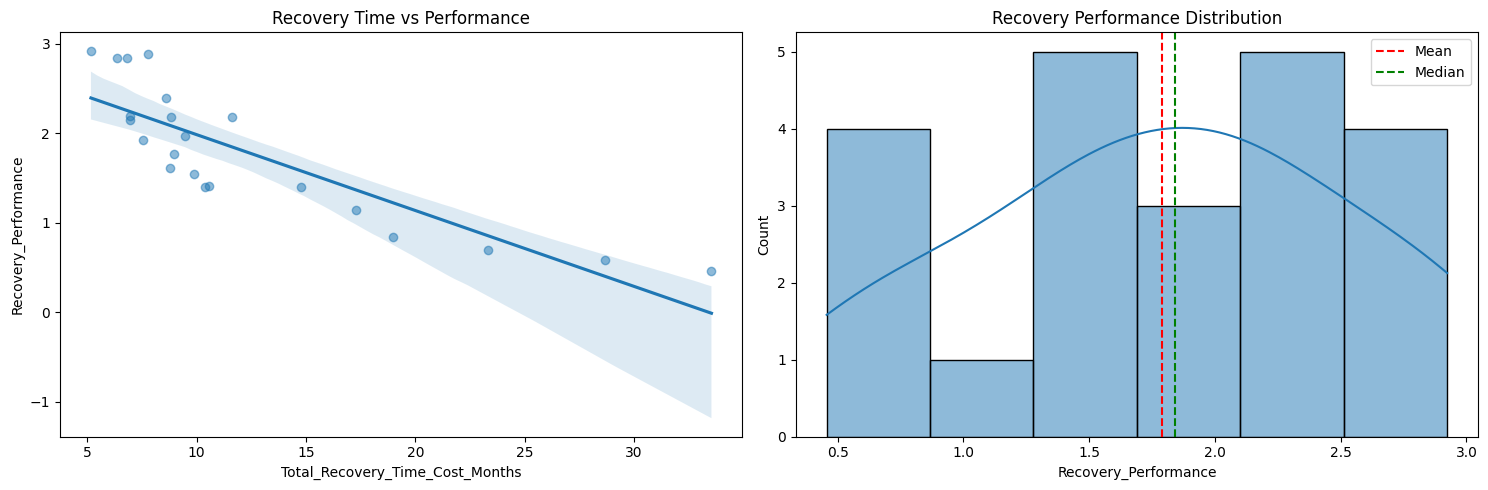

In [6]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def enhanced_statistical_analysis(df):
    """
    Enhanced statistical analysis of recovery time and performance with 
    additional metrics and visualizations
    """
    print("\nEnhanced Statistical Analysis:")
    
    # 1. Basic Statistics
    recovery_stats = df['Recovery_Performance'].describe()
    print("\nRecovery Performance Statistics:")
    print(recovery_stats)
    
    # 2. Correlation Analysis
    # Pearson correlation
    pearson_corr, pearson_p = stats.pearsonr(
        df['Total_Recovery_Time_Cost_Months'],
        df['Recovery_Performance']
    )
    
    # Spearman rank correlation
    spearman_corr, spearman_p = stats.spearmanr(
        df['Total_Recovery_Time_Cost_Months'],
        df['Recovery_Performance']
    )
    
    # 3. Regression Analysis
    X = df['Total_Recovery_Time_Cost_Months'].values.reshape(-1, 1)
    y = df['Recovery_Performance'].values
    reg = LinearRegression().fit(X, y)
    r_squared = reg.score(X, y)
    
    # 4. Effect Size (Cohen's d)
    def cohens_d(x1, x2):
        n1, n2 = len(x1), len(x2)
        var1, var2 = np.var(x1, ddof=1), np.var(x2, ddof=1)
        pooled_se = np.sqrt((var1 + var2) / 2)
        return (np.mean(x1) - np.mean(x2)) / pooled_se
    
    # Split data at median for effect size
    median = np.median(df['Total_Recovery_Time_Cost_Months'])
    low_time = df[df['Total_Recovery_Time_Cost_Months'] < median]['Recovery_Performance']
    high_time = df[df['Total_Recovery_Time_Cost_Months'] >= median]['Recovery_Performance']
    effect_size = cohens_d(low_time, high_time)
    
    # 5. Confidence Intervals
    confidence_level = 0.95
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    std_error = np.sqrt((1 - pearson_corr**2) / (len(df) - 2))
    ci_lower = pearson_corr - z_score * std_error
    ci_upper = pearson_corr + z_score * std_error
    
    # Print Results
    print("\nCorrelation Analysis:")
    print(f"Pearson Correlation: {pearson_corr:.3f} (p={pearson_p:.3f})")
    print(f"Spearman Correlation: {spearman_corr:.3f} (p={spearman_p:.3f})")
    print(f"R-squared from linear regression: {r_squared:.3f}")
    print(f"Effect size (Cohen's d): {effect_size:.3f}")
    print(f"\n{confidence_level*100}% Confidence Interval for correlation:")
    print(f"({ci_lower:.3f}, {ci_upper:.3f})")
    
    # 6. Visualization
    plt.figure(figsize=(15, 5))
    
    # Recovery Time vs Performance Scatter Plot
    plt.subplot(121)
    sns.regplot(
        data=df,
        x='Total_Recovery_Time_Cost_Months',
        y='Recovery_Performance',
        scatter_kws={'alpha':0.5}
    )
    plt.title('Recovery Time vs Performance')
    
    # Distribution Plot
    plt.subplot(122)
    sns.histplot(data=df, x='Recovery_Performance', kde=True)
    plt.axvline(df['Recovery_Performance'].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df['Recovery_Performance'].median(), color='green', linestyle='--', label='Median')
    plt.legend()
    plt.title('Recovery Performance Distribution')
    
    plt.tight_layout()
    plt.show()

    return {
        'pearson_correlation': pearson_corr,
        'spearman_correlation': spearman_corr,
        'r_squared': r_squared,
        'effect_size': effect_size,
        'confidence_interval': (ci_lower, ci_upper)
    }

if __name__ == "__main__":
    # Replace with your file path
    file_path = "data/cleaned_sheet1_data.csv"
    df = load_and_prepare_data(file_path)
    enhanced_statistical_analysis(df)